In [1]:
# Use needed libraries
using Random
using SSM
using Distributions
using Plots
using StatsBase
using CSV
using DataFrames
using LinearAlgebra

In [ ]:
# RUN FOR NEURAL PC RESHAPING
data_path = "C:/Users/zachl/OneDrive/BU_YEAR1/Research/Guassian_GLM_HMM_forTudor/ssm_julia/TD1d_R4C_Trials_100PCs.csv"
#data_path = "C:/Users/zachl/OneDrive/BU_YEAR1/Research/Guassian_GLM_HMM_forTudor/ssm_julia/TD1d_R4C_Trials_25N.csv"
kin_path = "C:/Users/zachl/OneDrive/BU_YEAR1/Research/Guassian_GLM_HMM_forTudor/ssm_julia/TD1d_R4C_Trials_Jaw_View1Y_for_PCs.csv"

# Define the dimensions
timepoints = 350  # or your actual number of timepoints
trials = 58       # or your actual number of trials
pcs = 100         # assuming you're using 100 principal components

# Read the CSV file
data_df = CSV.read(data_path, DataFrame, header=false)

# Convert DataFrame to a Matrix
data_matrix = Matrix(data_df)

# Check dimensions
if size(data_matrix) != (timepoints * trials, pcs)
    error("The size of data_matrix does not match the expected dimensions (timepoints * trials, pcs).")
end

# Reshape the data to a 3D array (trials, timepoints, pcs)
data_3d = reshape(data_matrix, (timepoints, trials, pcs))
data_3d = permutedims(data_3d, (2, 1, 3))  # Permute to get (trials, timepoints, pcs)

# Initialize the vector of matrices
X = Vector{Matrix{Float64}}(undef, trials)

# Populate the vector with each trial's data
for trial in 1:trials
    X[trial] = data_3d[trial, :, :]
end

# Check the shape of the first trial's data
println("Shape of X: ", size(X))
println("Shape of X[1]: ", size(X[1]))  # Should print (timepoints, pcs)

# Read the kinematics data (if needed)
kin_df = CSV.read(kin_path, DataFrame, header=false);
kin_matrix = Matrix(kin_df);
kin_matrix = kin_matrix[:, 1:trials];

# Convert kinematics data to Vector{Vector{Float64}}
kin = [kin_matrix[:, i] for i in 1:size(kin_matrix, 2)];



In [8]:
size(data_matrix)

(350, 290)

In [2]:
# Define data paths
# data_path = "C:/Users/zachl/OneDrive/BU_YEAR1/Research/Guassian_GLM_HMM_forTudor/trialdat.csv"
#kin_path = "c:/Users/zachl/OneDrive/BU_YEAR1/Research/Guassian_GLM_HMM_forTudor/Tongue_Length_HMM_Practice.csv"


# data_path = "C:/Users/zachl/OneDrive/BU_YEAR1/Research/Guassian_GLM_HMM_forTudor/ssm_julia/TD1d_R4C_Trials_reduced.csv"
# kin_path = "C:/Users/zachl/OneDrive/BU_YEAR1/Research/Guassian_GLM_HMM_forTudor/ssm_julia/TD1d_R4C_Trials_Tongue_Length_1_100_500_309_58dt.csv"

data_path = "C:/Users/zachl/OneDrive/BU_YEAR1/Research/Guassian_GLM_HMM_forTudor/ssm_julia/TD1d_R4C_Trials_25N.csv"
kin_path = "C:/Users/zachl/OneDrive/BU_YEAR1/Research/Guassian_GLM_HMM_forTudor/ssm_julia/TD1d_R4C_Trials_Jaw_View1Y.csv"

# Define the dimensions -> The matlab scrip should have the trialdat in timepoints, neurons, trials
timepoints = 200 # 500 in reduced set  
neurons = 25 # 50 in reduced set,305 in full set
trials = 58

# Read the CSV file
data_df = CSV.read(data_path, DataFrame, header=false)
kin_path = CSV.read(kin_path, DataFrame, header=false)

# Convert DataFrame to a Matrix
data_matrix = Matrix(data_df)
kin_matrix = Matrix(kin_path)

kin_matrix = kin_matrix[:, 1:trials]

# Convert kinematics data to Vector{Vector{Float64}}
kin = [kin_matrix[:, i] for i in 1:size(kin_matrix, 2)]

# Reshape the data to a 3D array (timepoints, trials, neurons)
data_3d = reshape(data_matrix, timepoints, trials, neurons)

# Initialize the vector of matrices
X = Vector{Matrix{Float64}}(undef, trials)

# Populate the vector with each trial's data
for trial in 1:trials
    X[trial] = data_3d[:, trial, :]
end

# Check the shape of the first trial's data
println("Shape of X: ", size(X))
println("Shape of X[1]: ", size(X[1]))  # Should print (350, 55)


Shape of X: (58,)
Shape of X[1]: (200, 25)


In [29]:
# # Vertically concatenate all data into one session
# kin_all = vcat(kin...)
# X_combined = vcat(X...)

# println("Size of kin_all: ", size(kin_all))
# println("Size of X_combined: ", size(X_combined))

# # Assuming these are defined from your data
# N = pcs  # Number of neurons
# tau = 5  # Temporal filter length (adjust as needed)
# T = 20300  # Number of timepoints in the session

# # Initialize the design matrix
# design_matrix = zeros(T - tau + 1, N * tau)

# # Populate the design matrix
# for t in tau:T
#     for n in 1:N
#         design_matrix[t - tau + 1, (n - 1) * tau + 1:n * tau] = X_combined[t - tau + 1:t, n]'
#     end
# end

# # Convert design_matrix to type Matrix{Float64}
# design_matrix = Matrix{Float64}(design_matrix)

# println("Shape of design_matrix: ", size(design_matrix))

# # Adjust kin_all to match the design matrix
# kin_all_adjusted = kin_all[tau:end];

Size of kin_all: (20300,)
Size of X_combined: (20300, 100)
Shape of design_matrix: (20296, 500)


In [3]:
# Initialize the model and prep data for use in model
model = SwitchingGaussianRegression(;K=2, λ=1e-12)

# kin_all = vcat(kin...)
# X_combined = vcat(X...)

# Train the model
ll, A_stor, π_stor, β1_stor, β2_stor, σ1_stor, σ2_stor = SSM.fit!(model, X, kin, 75, 1e-6, true);

Log-Lieklihood at iter 1: -7.170427430517225e7
Log-Lieklihood at iter 2: -45048.61420481731
Log-Lieklihood at iter 3: -44949.370032021565
Log-Lieklihood at iter 4: -44767.1720964308
Log-Lieklihood at iter 5: -44386.27330684732
Log-Lieklihood at iter 6: -43608.32672993694
Log-Lieklihood at iter 7: -42355.59712931331
Log-Lieklihood at iter 8: -41355.05989124515
Log-Lieklihood at iter 9: -40865.26968232367
Log-Lieklihood at iter 10: -40700.75810947736
Log-Lieklihood at iter 11: -40689.276412774394
Log-Lieklihood at iter 12: -40685.03375320344
Log-Lieklihood at iter 13: -40682.447878517174
Log-Lieklihood at iter 14: -40680.73505730411
Log-Lieklihood at iter 15: -40679.58715930884
Log-Lieklihood at iter 16: -40678.82116111155
Log-Lieklihood at iter 17: -40678.313673429366
Log-Lieklihood at iter 18: -40677.97968359337
Log-Lieklihood at iter 19: -40677.761058608
Log-Lieklihood at iter 20: -40677.61854629765
Log-Lieklihood at iter 21: -40677.5259443268
Log-Lieklihood at iter 22: -40677.4659191

In [4]:
function z_score(x::Vector{})
    return (x.-minimum(x)) ./ (maximum(x).-minimum(x))
end

z_score (generic function with 1 method)

In [5]:
# Plot the posterior state 

"""
Data: 58 Trials x 500 Timepoints with 50 neurons
Timestep of 1/100, from 0 to 5s starting at go queue
"""

"""
For Current Jaw Stuff
Data: 58 Trials x 205 neurons
Timestep of 1/100, from 0 to 2s starting at go queue
"""

# Use Viterbi to get best path for all the data
# best_path = SSM.viterbi(model, X_combined, kin_all);
best_path = SSM.viterbi(model, X, kin);
# Select a trial to plot
trial = 5
start = trial*350
stop = start+350-1

# Get kinematics and normalize to also plot
kin_trial = kin_all[start:stop]
kin_trial = z_score(kin_trial)



# Parameters for graphing
dt = 1/100
t_start = -0.5
t_end = 3 - dt
t = t_start:dt:t_end

# Plot the trial
fig2 = plot(t, best_path[start:stop] .-1, label="State", lw=1.5)
plot!(t, kin_trial, label="Tongue Length", lw=1.5)
plot!(legend=:topright)
title!("Viterbi States and Tongue Length")
xlabel!("Time (s)")
ylabel!("Normalized Var")
#savefig(fig2, "c::/Users/zachl/OneDrive/BU_Year1/Research/Guassian_GLM_HMM_forTudor/ssm_julia/Figures/Session_NoConverge_Viterbi.png");

MethodError: MethodError: no method matching viterbi(::SwitchingGaussianRegression{Float64}, ::Vector{Matrix{Float64}}, ::Vector{Vector{Float64}})

Closest candidates are:
  viterbi(::SSM.hmmglm, !Matched::Matrix{Float64}, !Matched::Vector{Float64})
   @ SSM c:\Users\zachl\OneDrive\BU_YEAR1\Research\SMM_Branch\ssm_julia\src\MarkovRegression.jl:305
  viterbi(::AbstractHMM, !Matched::Matrix{Float64})
   @ SSM c:\Users\zachl\OneDrive\BU_YEAR1\Research\SMM_Branch\ssm_julia\src\HiddenMarkovModels.jl:247


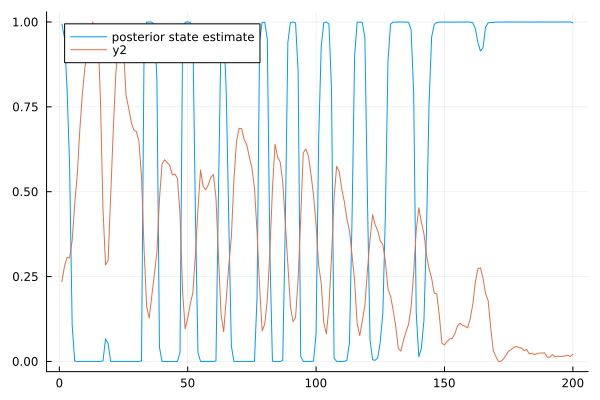

In [6]:
output = SSM.E_step.(Ref(model), X, kin)
γ, ξ, α = map(x-> x[1], output), map(x-> x[2], output), map(x-> x[3], output)

trial = 50

plot(exp.(γ[trial][:,1]), label="posterior state estimate")
plot!(z_score(kin[trial]))

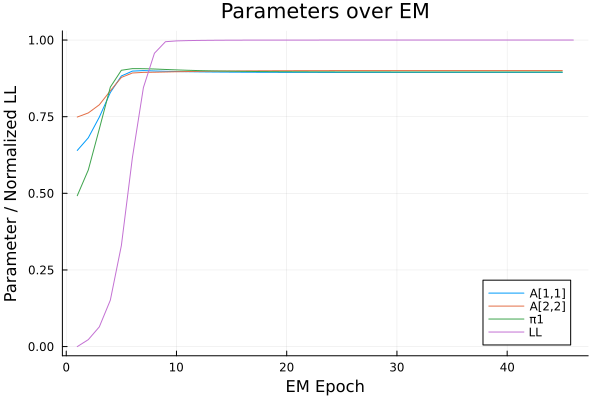

In [7]:
# Extract stored parameters to plot
A11 = [A[1,1] for A in A_stor];
A22 = [A[2,2] for A in A_stor];
π1 = [π[1] for π in π_stor];


# Plot the parameters
fig3 = plot(A11[3:end], label="A[1,1]")
plot!(A22[3:end], label="A[2,2]")
plot!(π1[3:end], label="π1")
plot!(z_score(ll[3:end]), label="LL")
title!("Parameters over EM")
xlabel!("EM Epoch")
ylabel!("Parameter / Normalized LL")
#savefig(fig3, "c::/Users/zachl/OneDrive/BU_Year1/Research/Guassian_GLM_HMM_forTudor/ssm_julia/Figures/Session_NoConverge_HMM_Params.png");

In [8]:
model.A

2×2 Matrix{Float64}:
 0.894335   0.105665
 0.0994126  0.900587

In [12]:
for element in σ1_stor
    println(element)
end

56.61880047041313
66.88698624656695
67.25137817139566
65.59138485770758
61.990157785906746
56.29854273172765
48.40851541491898
38.82446033359657
29.020531868598844
20.546497535900713
14.198851779540904
9.836576993373372
6.958446350678406
5.142681137886898
3.864868315105562
2.92660403462508
2.3252181251365447
2.046597261091902
2.13656891627564
2.331297672483158
3.5382824489743854
1.4941766360352002
0.0010665520068682138
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN


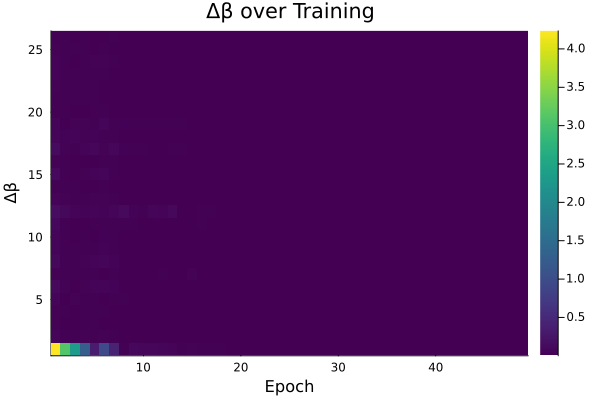

In [17]:
# Plot the change in β for each state over EM Epoch
δβ1 = [abs.(β1_stor[i] .- β1_stor[i-1]) for i in 2:length(β1_stor)];
δβ2 = [abs.(β2_stor[i] .- β2_stor[i-1]) for i in 2:length(β2_stor)];



data_matrix = hcat(δβ1...)
heatmap(data_matrix, xlabel="Epoch", ylabel="Δβ", title="Δβ over Training", color=:viridis)

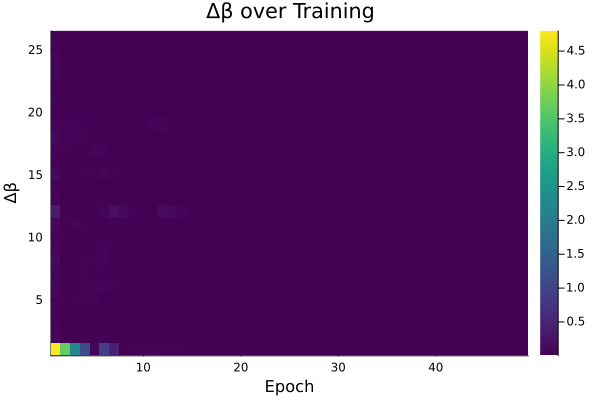

In [18]:
data_matrix = hcat(δβ2...)
heatmap(data_matrix, xlabel="Epoch", ylabel="Δβ", title="Δβ over Training", color=:viridis)

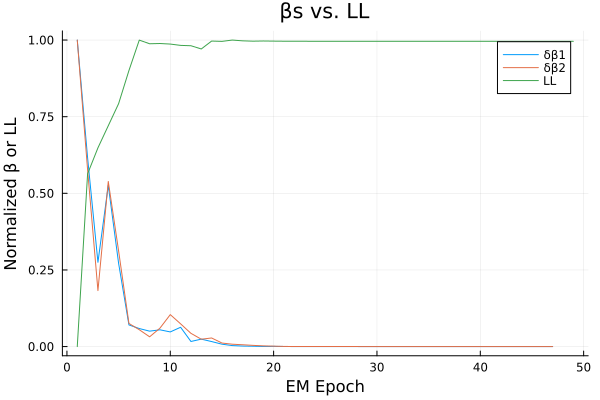

In [19]:
δβ1_sum = sum.(δβ1);
δβ2_sum = sum.(δβ2);

fig4 = plot(z_score(δβ1_sum[3:end]), label="δβ1")
plot!(z_score(δβ2_sum[3:end]), label="δβ2")
plot!(z_score(ll[3:end]), label="LL")
plot!(legend=:topright)
title!("βs vs. LL")
xlabel!("EM Epoch")
ylabel!("Normalized β or LL")
#savefig(fig4, "c::/Users/zachl/OneDrive/BU_Year1/Research/Guassian_GLM_HMM_forTudor/ssm_julia/Figures/Session_NoConverge_Regression_Betas.png");

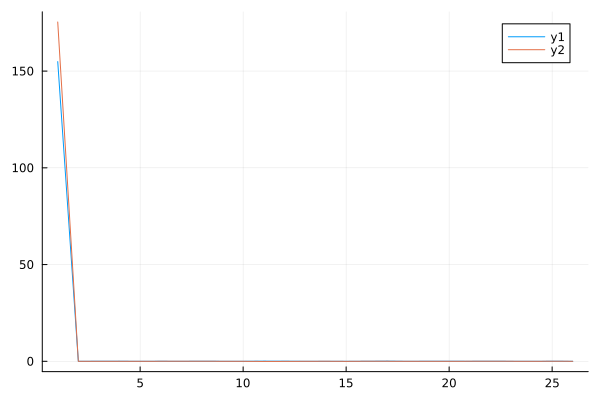

In [20]:
plot(model.B[1].regression.β)
plot!(model.B[2].regression.β)

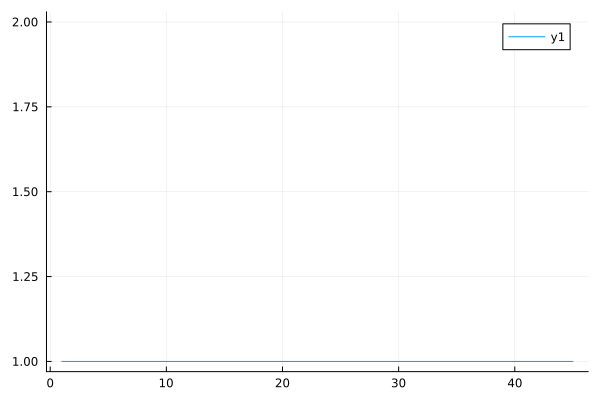

In [21]:
plot(σ2_stor[6:end])

In [22]:
β1_stor

50-element Vector{Vector{Float64}}:
 [164.02371495089065, -0.023070912530228797, 0.015567664956346134, 0.030427060412348432, -0.035053175543524134, 0.023788903876711162, 0.022850290187206065, 0.07897491122885085, 0.013196807748647068, -0.02581230555672202  …  0.012959796087970744, -0.0808685573951838, 0.008074935036757557, 0.005966225170435729, -0.008994144051768503, 0.008089040479008998, -0.01401088891884446, 0.007105506135649035, 0.02264053324248353, -0.018893536037504374]
 [159.78858944025723, -0.0727363622824793, 0.03430960489217943, 0.05034848529967969, 0.02165412041059573, 0.11372392232947301, 0.04226338971841171, 0.15648912008754792, 0.06510181392215755, 0.02335993432072078  …  0.1192794668207982, -0.14657900699956414, -0.05668911756125573, 0.013839060766225446, -0.023940113446894274, -0.012485224670343607, -0.05046369444564478, 0.03867383554424961, -0.00046336259367730435, -0.013781655128649003]
 [156.68681688400127, -0.07961015776873612, 0.03538398454899229, 0.0559922487949247

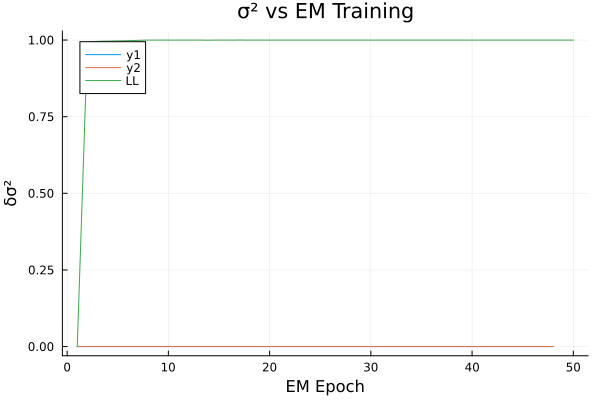

In [23]:
δσ1 = abs.(diff(σ1_stor));
δσ2 = abs.(diff(σ2_stor));

fig5 = plot(δσ1[2:end])
plot!(δσ2[2:end])
plot!(z_score(ll[2:end]), label="LL")
title!("σ² vs EM Training")
xlabel!("EM Epoch")
ylabel!("δσ²")
#savefig(fig5, "c::/Users/zachl/OneDrive/BU_Year1/Research/Guassian_GLM_HMM_forTudor/ssm_julia/Figures/Session_NoConverge_Regression_Sigmas.png");